In [24]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [25]:
df1=pd.read_csv('C:/Users/every/OneDrive/Desktop/notes/data/kaggle/kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','Song_id','freq'])

In [26]:
df1.head()

,user_id,Song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [27]:
df2=pd.read_csv('C:/Users/every/OneDrive/Desktop/notes/data/kaggle/unique_tracks.txt',sep='<SEP>',names=['track_id','Song_id','artist','release'])

In [28]:
df1.head()

,user_id,Song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [29]:
df2.head()

,track_id,Song_id,artist,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [30]:
final = pd.merge(df1, df2, how='left', on = 'Song_id')

In [31]:
final.head()

,user_id,Song_id,freq,track_id,artist,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [32]:
final.columns

Index(['user_id', 'Song_id', 'freq', 'track_id', 'artist', 'release'], dtype='object')

In [33]:

final.drop(['track_id'], axis =1,inplace=True)

In [34]:
final.head()

,user_id,Song_id,freq,artist,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [35]:
final.isnull().sum()

user_id    0
Song_id    0
freq       0
artist     0
release    1
dtype: int64

In [36]:
final['release']=final['release'].fillna(final['release'].mode()[0])

In [37]:
final['artist']=final['artist'].fillna(final['artist'].mode()[0])

In [38]:
final.isnull().sum()

user_id    0
Song_id    0
freq       0
artist     0
release    0
dtype: int64

In [39]:
final.shape

(1491952, 5)

In [40]:
print('Total data points:',final.shape[0])
print('Total number of user:',final['user_id'].unique().shape[0])
print('Total number of songs:',final['Song_id'].unique().shape[0])


Total data points: 1491952
Total number of user: 110000
Total number of songs: 163206


In [41]:
print('Number of unique release:',final['release'].unique().shape[0])
print('Number of unique Artist:',final['artist'].unique().shape[0])

Number of unique release: 137670
Number of unique Artist: 28367


In [42]:
final.describe()

,freq
count,1.491952e+06
mean,3.179719e+00
std,7.015023e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [43]:
final.isnull().sum()

user_id    0
Song_id    0
freq       0
artist     0
release    0
dtype: int64

In [44]:
# Distribution of freq

<AxesSubplot:xlabel='freq', ylabel='Density'>

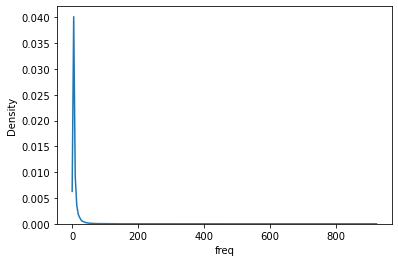

In [45]:
sns.kdeplot(data=final, x="freq")


In [46]:
final['artist'].value_counts()

Coldplay                      13675
Kings Of Leon                 11586
Justin Bieber                  9259
Florence + The Machine         8213
Eminem                         8160
                              ...  
The Kumba Mela Experiment         1
Ernie K. Doe                      1
El Guapo Stuntteam                1
Erik Segerstedt                   1
The AB's (formerly Asamov)        1
Name: artist, Length: 28367, dtype: int64

In [47]:
final['release'].value_counts()

Sehr kosmisch                     5044
Undo                              4483
You're The One                    4270
Use Somebody                      3822
Dog Days Are Over (Radio Edit)    3780
                                  ... 
Buscaré otro amor                    1
Almas Transparentes                  1
Dog-Headed Whore                     1
Glass In My Mouth                    1
Seeing For The Very First Time       1
Name: release, Length: 137670, dtype: int64

In [48]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491952 entries, 0 to 1491951
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1491952 non-null  object
 1   Song_id  1491952 non-null  object
 2   freq     1491952 non-null  int64 
 3   artist   1491952 non-null  object
 4   release  1491952 non-null  object
dtypes: int64(1), object(4)
memory usage: 68.3+ MB


In [49]:
final['artist'].nunique()

28367

In [50]:
final['user_id'].nunique()

110000

In [51]:
final['Song_id'].nunique()

163206

In [52]:
final['freq'].nunique()

299

In [53]:
final['release'].nunique()

137670

In [54]:
final.Song_id.count()

1491952

In [55]:
final['artist'].value_counts()[:20]

Coldplay                  13675
Kings Of Leon             11586
Justin Bieber              9259
Florence + The Machine     8213
Eminem                     8160
Muse                       7916
Jack Johnson               7465
Taylor Swift               7435
Train                      6617
The Black Keys             6507
OneRepublic                6027
Linkin Park                5846
Radiohead                  5764
The Killers                5721
John Mayer                 5452
Daft Punk                  5411
Evanescence                5170
Björk                      5144
Guns N' Roses              5061
Harmonia                   5046
Name: artist, dtype: int64

In [56]:
final['release'].value_counts()[:20]

Sehr kosmisch                                                          5044
Undo                                                                   4483
You're The One                                                         4270
Use Somebody                                                           3822
Dog Days Are Over (Radio Edit)                                         3780
Revelry                                                                3672
Secrets                                                                3456
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    3272
Somebody To Love                                                       3263
Hey_ Soul Sister                                                       2791
Fireflies                                                              2745
Tive Sim                                                               2669
Love Story                                                             2633
Yellow      

In [57]:
final.columns

Index(['user_id', 'Song_id', 'freq', 'artist', 'release'], dtype='object')

# Number of song listened per user

In [58]:
songperuser=final.loc[:, ['user_id', 'Song_id']]

In [59]:
df=songperuser.groupby('user_id').count()

In [60]:
songperuser.head()

,user_id,Song_id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11


In [66]:
df.head()

,Song_id
user_id,
00007a02388c208ea7176479f6ae06f8224355b3,9
00014a76ed063e1a749171a253bca9d9a0ff1782,11
00015189668691680bb1a2e58afde1541ec92ced,17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
00020fcd8b01986a6a85b896ccde6c49f35142ad,32


In [62]:
df.sort_values(by='Song_id', ascending=True).head()

,Song_id
user_id,
b4f681dac463c297568bffe7f4b646b74a5e6d0d,5
1691b9058739f0b88ac2777e5bbffe0e1d400f2d,5
d1764e1f4626164793d400b95efb4a5f80a06cf9,5
d1776bb80cf8298288974c52f903cc3b9601761a,5
98d00906e235bede8d2b14b9cf5b802ee2438231,5


In [63]:
df.sort_values(by='Song_id', ascending=True).tail()

,Song_id
user_id,
016a24e91a72c159a5048ab1b9b2ba5ce761b526,54
3233c598c50f0ddbd351504e773cd51de79691db,55
d30e18323f15426c3cdc8585252ed34459916f51,55
ad4b2717e89766b66b96fe52a38736116e315874,57
316110734d8da7478cc33237458814f770a9eb7a,57


In [64]:
df.describe()

,Song_id
count,110000.000000
mean,13.563200
std,8.321648
min,5.000000
25%,7.000000
50%,11.000000
75%,18.000000
max,57.000000


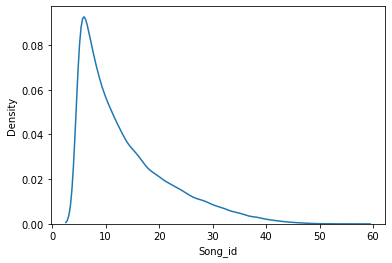

In [65]:
sns.kdeplot(df.Song_id)
plt.show()